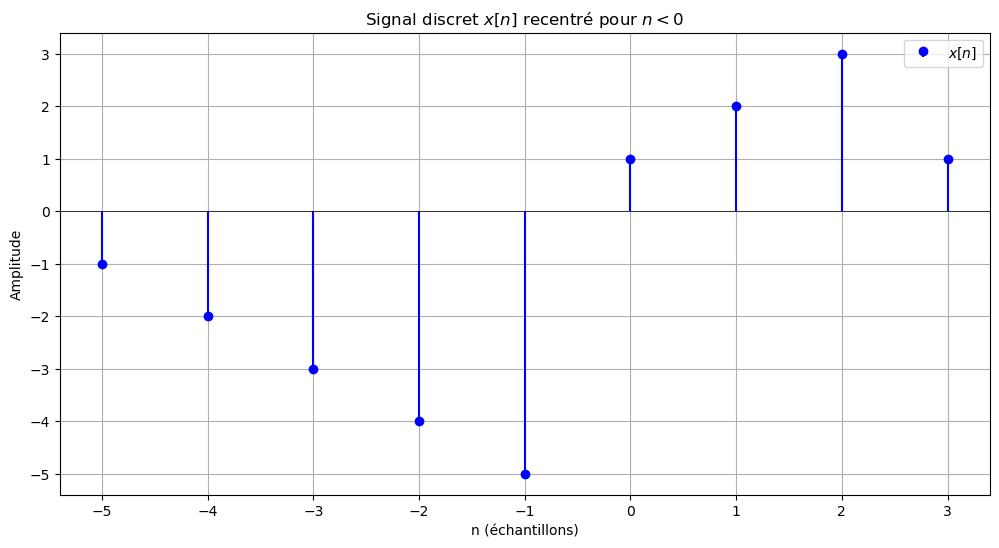

In [1]:
# Activer l'affichage dans le notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Paramètres
N_positive = 4  # Nombre d'échantillons pour n >= 0
N_negative = 5   # Nombre d'échantillons pour n < 0
n = np.arange(-N_negative, N_positive)  # Indices allant de -5 à 9

# Initialisation avec des valeurs négatives et des impulsions
x_n = np.zeros(len(n))  # Initialisation

# Ajouter des valeurs négatives pour n < 0
x_n[:N_negative] = [-1, -2, -3, -4, -5]


x_n[N_negative + 0:] = [1, 2, 3, 1]# Valeurs négatives

# Ajouter des valeurs aléatoires pour n > 3
 # Mélange de négatifs et positifs

# Tracer le signal
plt.figure(figsize=(12, 6))
plt.stem(n, x_n, basefmt=" ", linefmt="blue", markerfmt="bo", label='$x[n]$')
plt.axhline(0, color='black', linewidth=0.5)  # Ligne de base pour recentrer
plt.title("Signal discret $x[n]$ recentré pour $n < 0$")
plt.xlabel("n (échantillons)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

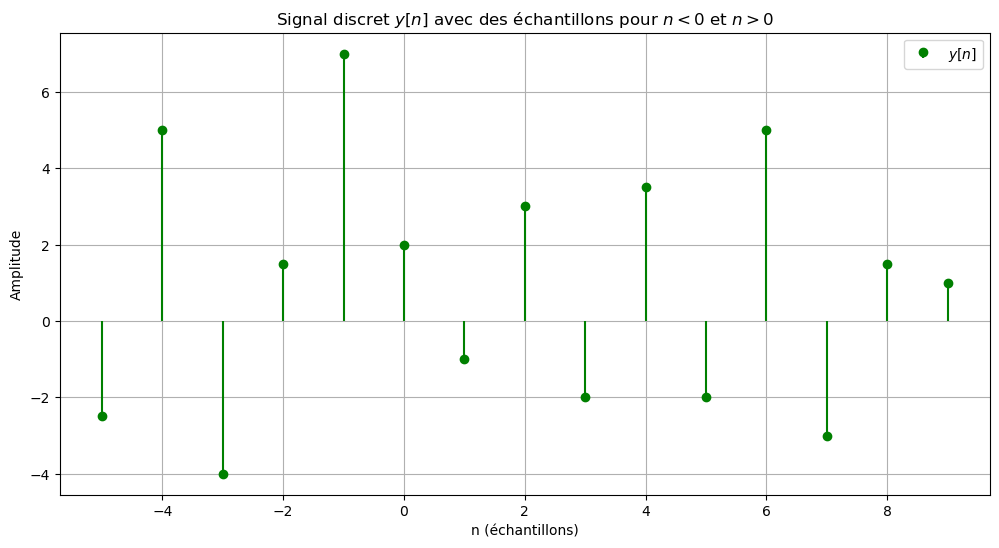

In [17]:
# Activer l'affichage dans le notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Paramètres
N_positive = 10  # Nombre d'échantillons pour n >= 0
N_negative = 5   # Nombre d'échantillons pour n < 0
n = np.arange(-N_negative, N_positive)  # Indices allant de -5 à 9

# Initialisation de y[n] avec des valeurs différentes
y_n = np.zeros(len(n))  # Initialisation

# Ajouter des valeurs aléatoires pour n < 0 (négatives)
y_n[:N_negative] = [-2.5, 5, -4, 1.5, 7]# Valeurs aléatoires négatives

# Ajouter des valeurs aléatoires pour n > 0 (positives)
y_n[N_negative + 0:] = [2,-1,3,-2,3.5, -2, 5, -3, 1.5, 1]

# Tracer le signal y[n]
plt.figure(figsize=(12, 6))
plt.stem(n, y_n, basefmt=" ", linefmt="green", markerfmt="go", label='$y[n]$')
plt.title("Signal discret $y[n]$ avec des échantillons pour $n < 0$ et $n > 0$")
plt.xlabel("n (échantillons)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


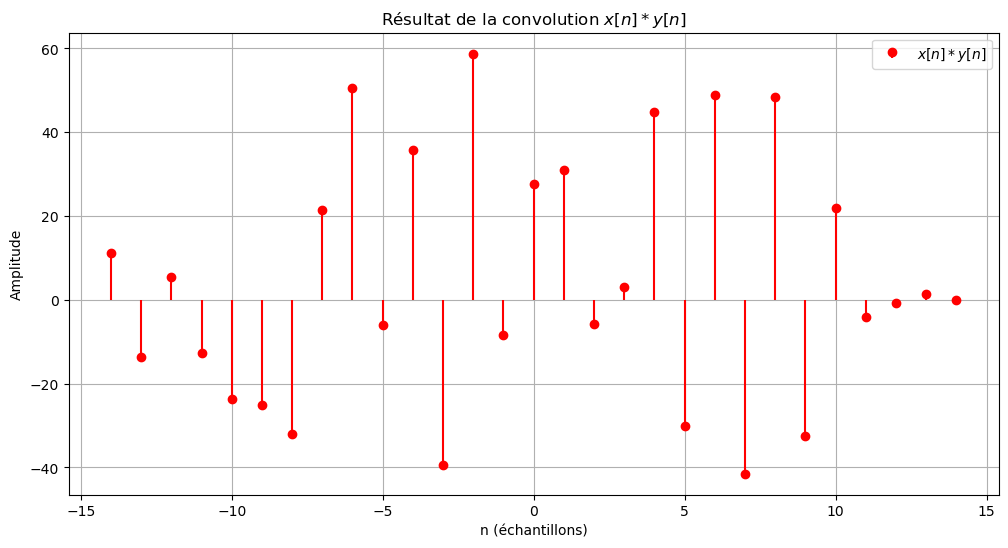

In [9]:
# Convolution des signaux
conv_result = np.convolve(x_n, y_n, mode='full')  # Convolution complète
conv_indices = np.arange(-len(x_n) + 1, len(y_n))  # Indices pour la convolution

# Tracer le résultat de la convolution
plt.figure(figsize=(12, 6))
plt.stem(conv_indices, conv_result, basefmt=" ", linefmt="red", markerfmt="ro", label='$x[n] * y[n]$')
plt.title("Résultat de la convolution $x[n] * y[n]$")
plt.xlabel("n (échantillons)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


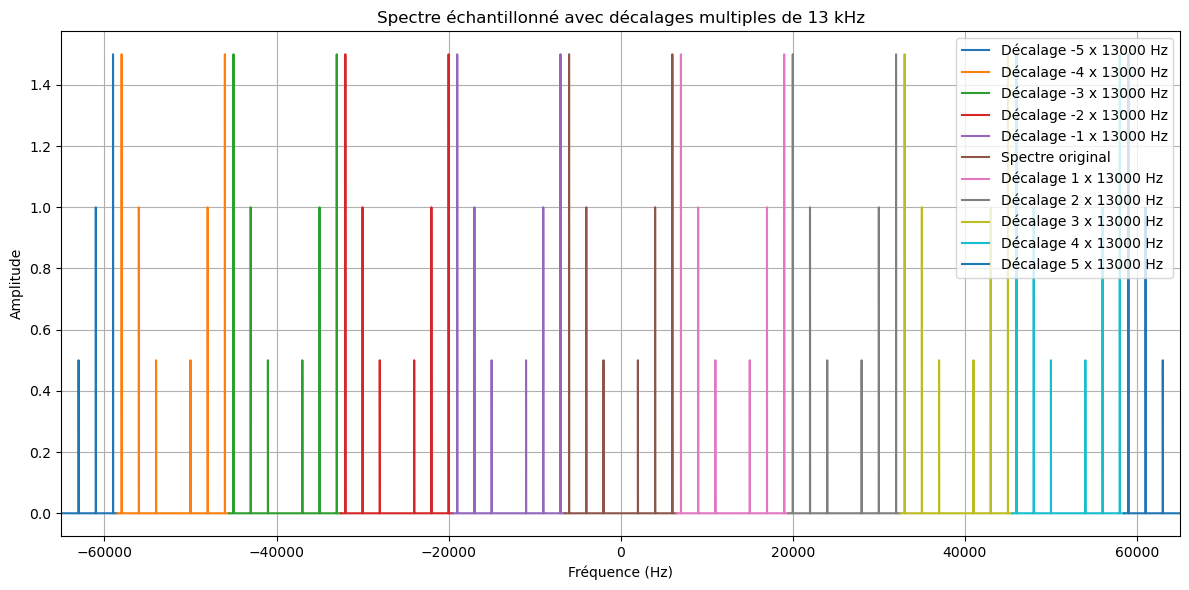

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# 1. Définition du signal x(t)
fs = 13000  # Fréquence d'échantillonnage initiale (Hz)
T = 1 / fs   # Période d'échantillonnage
t = np.linspace(0, 1, fs, endpoint=False)  # Temps (1 seconde)

# Signal x(t) : composé de sinusoïdes à différentes fréquences
x_t = np.cos(2 * np.pi * 2000 * t) + 2 * np.cos(2 * np.pi * 4000 * t) + 3 * np.cos(2 * np.pi * 6000 * t)

# 2. Calcul de la FFT du signal x(t)
fft_result = fft(x_t)  # Transformée de Fourier rapide du signal
frequencies = fftfreq(len(x_t), 1 / fs)  # Fréquences associées 

# Décalage pour centrer autour de 0 Hz
amplitude_shifted = np.abs(fftshift(fft_result)) / len(x_t)  # Amplitude normalisée
frequencies_shifted = fftshift(frequencies)  # Décalage des fréquences

# 3. Décalage fréquentiel par des multiples de 13 kHz
multiples = range(-5, 6)  # Décalages de -5  à +5 fois fs (incluant 0)

plt.figure(figsize=(12, 6))

# Affichage du spectre pour chaque décalage

for multiple in multiples:
    shifted_frequencies = frequencies_shifted + (multiple * fs)
    label = f"Décalage {multiple} x 13000 Hz" if multiple != 0 else "Spectre original"
    plt.plot(shifted_frequencies, amplitude_shifted, label=label)

# 4. Visualisation
plt.title("Spectre échantillonné avec décalages multiples de 13 kHz")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(-5 * fs, 5 * fs)  # Plage de fréquences pour visualiser les décalages multiples
plt.legend()
plt.tight_layout()
plt.show()


- frequencies_shifted : Les fréquences du spectre initial (centré autour de 0 Hz grâce à fftshift).
multiple * fs : Le décalage fréquentiel calculé pour le multiple actuel. Par exemple :
Si multiple = 2, le décalage est 
2×13,000=26,000 Hz
Si multiple = -3, le décalage est −3×13,000=−39000 Hz
−3×13,000=−39,000Hz.
shifted_frequencies : On additionne le décalage (
multiple×fs) aux fréquences originales pour obtenir les fréquences décalées.


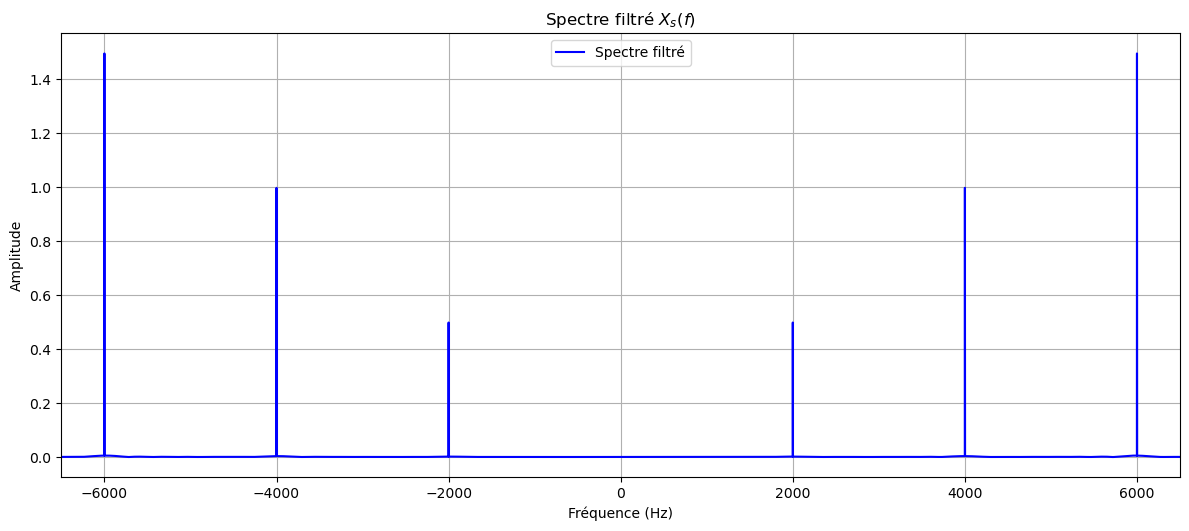

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import firwin, lfilter

# 1. Définition du signal x(t)
fs = 13000  # Fréquence d'échantillonnage (Hz)
T = 1 / fs   # Période d'échantillonnage
t = np.linspace(0, 1, fs, endpoint=False)  # Temps (1 seconde)

# Signal x(t) : composé de sinusoïdes à différentes fréquences
x_t = np.cos(2 * np.pi * 2000 * t) + 2 * np.cos(2 * np.pi * 4000 * t) + 3 * np.cos(2 * np.pi * 6000 * t)

# 2. Création du filtre passe-bas
cutoff_freq = 6400 # Fréquence de coupure (Hz) inférieure à fs/2
numtaps = 101  # Nombre de coefficients du filtre FIR
lowpass_filter = firwin(numtaps, cutoff_freq, fs=fs, pass_zero='lowpass')  # Créer le filtre passe-bas

# 3. Application du filtre passe-bas
x_t_filtered = lfilter(lowpass_filter, 1.0, x_t)  # Filtrage FIR

# 4. Calcul de la FFT du signal filtré
fft_result_filtered = fft(x_t_filtered)  # Transformée de Fourier rapide
frequencies_filtered = fftfreq(len(x_t_filtered), 1 / fs)  # Fréquences associées

# Normalisation des amplitudes
amplitude_filtered = np.abs(fft_result_filtered) / len(x_t_filtered)

# Diviser les amplitudes pour un spectre bilatéral (à l'exception de la composante DC)
amplitude_filtered[1:]/ 2  # Multiplier par 2 pour les fréquences non-DC

# Décalage du spectre pour visualisation
amplitude_shifted_filtered = fftshift(amplitude_filtered)  # Décalage du spectre
frequencies_shifted_filtered = fftshift(frequencies_filtered)  # Décalage des fréquences

# 5. Visualisation
plt.figure(figsize=(12, 10))

# Graphique 1: Spectre filtré (spectre bilatéral)
plt.subplot(2, 1, 1)
plt.plot(frequencies_shifted_filtered, amplitude_shifted_filtered, label="Spectre filtré", color="blue")
plt.title("Spectre filtré $X_s(f)$")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(-fs / 2, fs / 2)  # Plage de fréquences jusqu'à la fréquence de Nyquist
plt.legend()

plt.tight_layout()
plt.show()


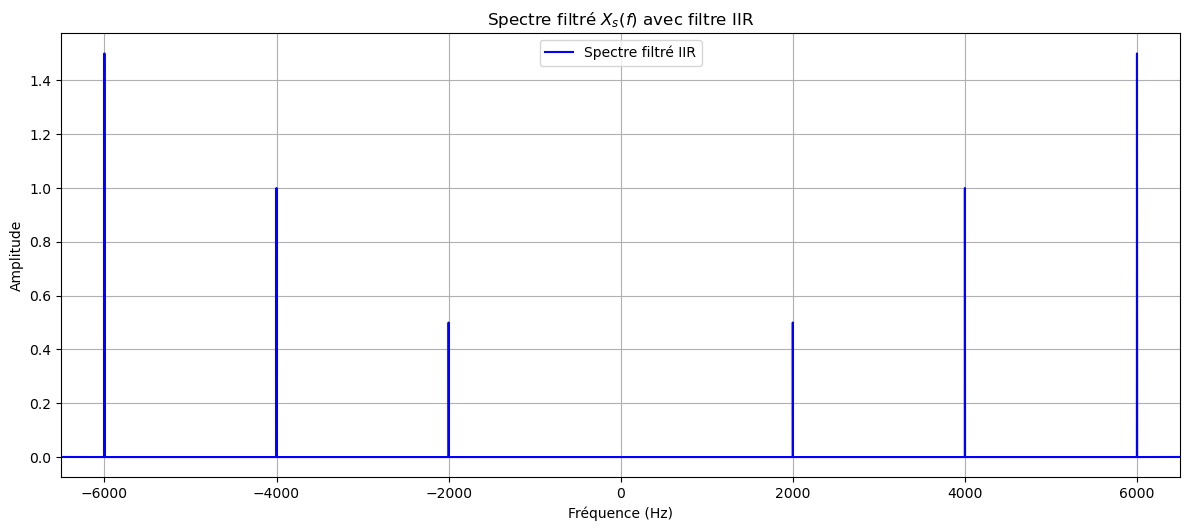

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import butter, lfilter

# 1. Définition du signal x(t)
fs = 13000  # Fréquence d'échantillonnage (Hz)
T = 1 / fs   # Période d'échantillonnage
t = np.linspace(0, 1, fs, endpoint=False)  # Temps (1 seconde)

# Signal x(t) : composé de sinusoïdes à différentes fréquences
x_t = np.cos(2 * np.pi * 2000 * t) + 2 * np.cos(2 * np.pi * 4000 * t) + 3 * np.cos(2 * np.pi * 6000 * t)

# 2. Définition du filtre Butterworth passe-bas (IIR)
cutoff_freq = 6400  # Fréquence de coupure (Hz)
order = 4  # Ordre du filtre

# Calcul des coefficients du filtre Butterworth
b, a = butter(order, cutoff_freq, fs=fs, btype='low', analog=False)

# 3. Application du filtre IIR (Butterworth)
x_t_filtered_iir = lfilter(b, a, x_t)  # Filtrage IIR

# 4. Calcul de la FFT du signal filtré
fft_result_filtered_iir = fft(x_t_filtered_iir)  # Transformée de Fourier rapide
frequencies_filtered_iir = fftfreq(len(x_t_filtered_iir), 1 / fs)  # Fréquences associées

# Normalisation des amplitudes
amplitude_filtered_iir = np.abs(fft_result_filtered_iir) / len(x_t_filtered_iir)

# Diviser les amplitudes pour un spectre bilatéral (à l'exception de la composante DC)
amplitude_filtered_iir[1:] / 2  # Diviser par 2 pour les fréquences non-DC

# Décalage du spectre pour visualisation
amplitude_shifted_filtered_iir = fftshift(amplitude_filtered_iir)  # Décalage du spectre
frequencies_shifted_filtered_iir = fftshift(frequencies_filtered_iir)  # Décalage des fréquences

# 5. Visualisation
plt.figure(figsize=(12, 10))

# Graphique 1: Spectre filtré (spectre bilatéral)
plt.subplot(2, 1, 1)
plt.plot(frequencies_shifted_filtered_iir, amplitude_shifted_filtered_iir, label="Spectre filtré IIR", color="blue")
plt.title("Spectre filtré $X_s(f)$ avec filtre IIR")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(-fs / 2, fs / 2)  # Plage de fréquences jusqu'à la fréquence de Nyquist
plt.legend()

plt.tight_layout()
plt.show()


- Un filtre IIR est appelé "réponse impulsionnelle infinie" parce que sa réponse à un signal d'entrée, appelée impulsion, ne se termine pas après un nombre fini d'échantillons, contrairement aux filtres FIR (Finite Impulse Response). En d'autres termes, un filtre IIR peut utiliser une combinaison d'entrées passées ET de sorties passées pour déterminer la sortie actuelle, ce qui lui donne une réponse infinie.
- Cela se produit parce qu'un filtre IIR utilise non seulement les entrées passées mais aussi les sorties passées pour calculer la sortie actuelle. Cela crée une sorte de "mémoire" qui fait en sorte que l'effet du signal d'entrée peut durer longtemps. Ainsi, même après que l'impulsion initiale ait disparu, le filtre continue à influencer la sortie avec ses propres "souvenirs".